# Homework 3 #

Create the dataset.  <br/>
Separate variables and target - "quality".

In [4]:
import pandas as pd
# Reading the csv file
df = pd.read_csv('winequality-red.csv')
# Separating the variables from the target
variables = df.drop("quality", axis= 1)
target = df['quality']

Do a 80-20 train-test split using a fixed seed.

In [5]:
from sklearn.model_selection import train_test_split
# Training Test Split
variables_train, variables_test, target_train, target_test= train_test_split(variables, target, 
                                                                         train_size=0.8, stratify=target, random_state=0)

### Exercise 1 ##

Learn 10 MLP regressors with the parameters specified but with different seeds (from 0 to 9). The final ouput is considered to be the average of the ones predicted by each of these MLP regressors for the test data.

In [ ]:
import numpy as np
from sklearn.neural_network import MLPRegressor

y_pred = np.zeros(len(target_test))

for i in range(10):
    # Learn the MLP regressor 
    mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', solver='adam', early_stopping=True, validation_fraction=0.2, random_state=i)
    #Predict output
    y_pred += mlp.fit(variables_train,target_train).predict(variables_test)
    
y_pred = y_pred/10

Calculate the absolute value of the residues (difference between the predicted output for the test data and the real output). 

In [7]:
# Calculate the residues
residues = abs(target_test - y_pred)

Plot the residues using an histogram.

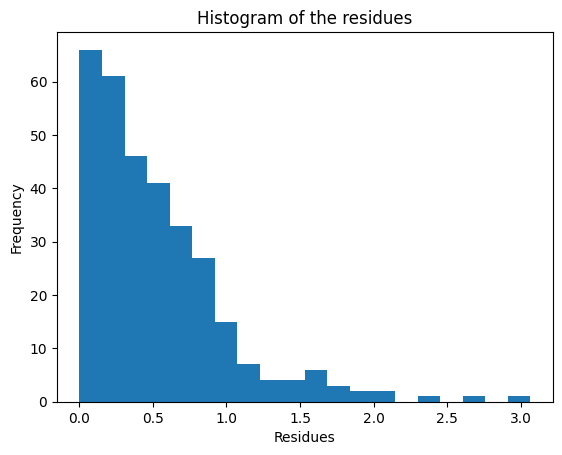

In [8]:
import matplotlib.pyplot as plt

# Plot the residues
plt.hist(residues,bins=20)
plt.title('Histogram of the residues')
plt.xlabel('Residues')
plt.ylabel('Frequency')
plt.savefig('ex1_histogram.png')
plt.show()

### Exercise 2 ###

Round the predicted output to the nearest integer and bound it between [0,10]. 

In [9]:
# Round and bound the predictions
rounded_predictions = np.round(y_pred)
rounded_and_bounded_predictions = np.clip(rounded_predictions,0,10)

Calculate both the previous and the new Mean Absolute Error and compare them.

In [14]:
# Calculate previous MAE
mae = np.mean(abs(target_test - y_pred))
#Calculate new MAE
mae_new = np.mean(abs(target_test - rounded_and_bounded_predictions))

print('The previous MAE is: ', mae)
print('The new MAE is: ', mae_new)

if mae_new < mae:
    print('The new MAE is lower than the previous one')
elif mae_new > mae:
    print('The new MAE is higher than the previous one')
else:
    print('The new MAE is equal to the previous one')

The previous MAE is:  0.511668698743854
The new MAE is:  0.45625
The new MAE is lower than the previous one


### Exercise 3 ###

Learn 4 different MLP regressors with the same parameters as before except early stopping, instead stopping after 20, 50, 100 and 200 iterations. Calculate their root mean squared error. In each of these MLP regressors the predicted output is still considered to be the average of 10 regressors with seeded from 0 to 9.

In [ ]:
# Calculate the RMSE for each number of iterations
rmse = []
for iter in [20,50,100,200]:
    y_pred = np.zeros(len(target_test))
    for i in range(10):
        # Learn the MLP regressor 
        mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', solver='adam', max_iter = iter, validation_fraction=0.2, random_state=i)
        #Predict output
        y_pred += mlp.fit(variables_train,target_train).predict(variables_test)
    y_pred = y_pred/10
    rmse.append(np.sqrt(np.mean((y_pred-target_test)**2)))


Plot the RMSE against the maximum number of iteration of the regressor. 

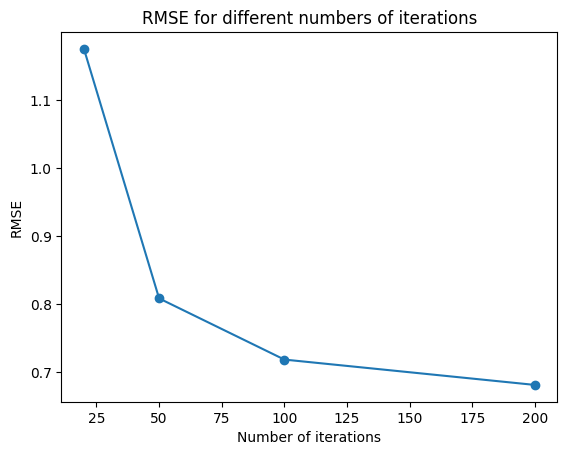

In [13]:
# Plot the RMSE
plt.plot([20,50,100,200], rmse, '-o')
plt.title('RMSE for different numbers of iterations')
plt.xlabel('Number of iterations')
plt.ylabel('RMSE')
plt.savefig('ex3_rmse.png')
plt.show()